In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Build a model that seperates the items into corresponing classes

In [3]:
iris = pd.read_csv("/content/Iris.csv")
 

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [22]:
# Examine and replace missing values 
print(iris.isnull().values.any())

False


Sentosa is seperated from the other 2 species.

In [7]:
print( 'How many sepcies?: \n',iris["Species"].value_counts())

How many sepcies?: 
 Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


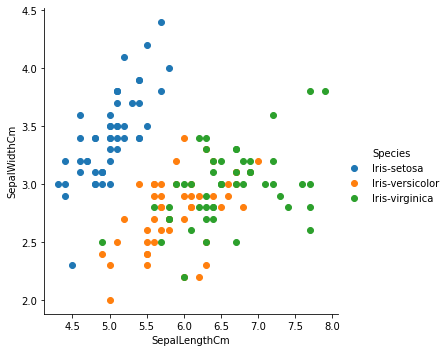

In [10]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

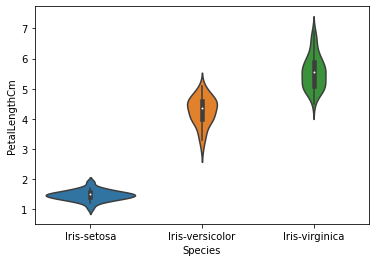

In [11]:
#look into the distribution of petal length for each species
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)


In [13]:
import plotly.figure_factory as ff
corrs = iris.corr()

fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title= 'Correlation of whole Data',  
                          plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                          title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                          font=dict(color='#8a8d93'))

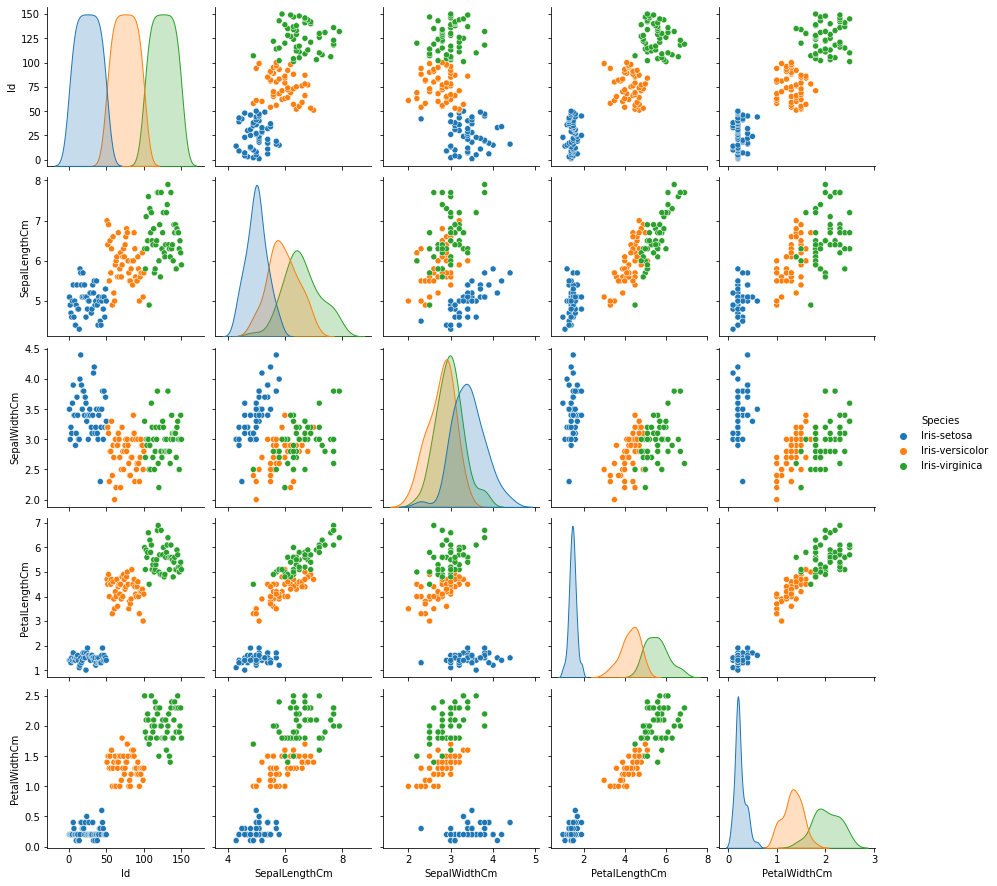

In [17]:
# look at the bivariate relation between each pair of features
sns.pairplot(iris, hue="Species",diag_kind="kde")

#Classification Models

First lets split the data into train and test sets

In [23]:
# Change text based label for output label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris = iris.copy(deep = True)

iris['Species'] = le.fit_transform(iris['Species'])

print('Label Encoder Transformation')
print(iris['Species'].unique(),' = ',le.inverse_transform(iris['Species'].unique()))

Label Encoder Transformation
[0 1 2]  =  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split

In [54]:
train, test = train_test_split(iris, test_size = 0.25,random_state=100)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [33]:
train_X=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species

#Lets try K nearest neighbour
- supervised learning
- How it works? Predict what class a data point belongs to by calculating the distance between test data and all training data.
- K number is the number of nearest neighbours

In [31]:
# KNearest Neighbour
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics
KNN=KNeighborsClassifier(n_neighbors=3) 

In [34]:
KNN.fit(train_X,train_y)
prediction=KNN.predict(test_X)

In [35]:

print('accuracy score in percent:',metrics.accuracy_score(prediction,test_y)*100)

accuracy score in percent: 97.36842105263158


Looking at the confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
prediction=KNN.predict(test_X)
confusion_matrix(test_y,prediction)

array([[14,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 13]])

In [41]:
predictions_test = le.inverse_transform(prediction)
predictions_test

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [55]:
# Little test
newval=pd.DataFrame({'SepalLengthCm':[4],'SepalWidthCm':[2],'PetalLengthCm':[1],'PetalWidthCm':[2]})
# convert it to text
predictions_test = le.inverse_transform(KNN.predict(newval))
predictions_test

array(['Iris-setosa'], dtype=object)

#Lets try KMeans
-unsupervised learning
- K refers to the number of clusters

In [79]:
iris.head()
iris_c =iris.copy()
iris_c.drop(columns=['Id'])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


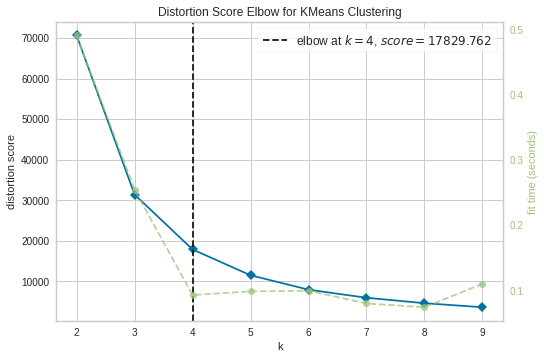

In [82]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
# metric='silhouette')
visualizer.fit(iris_c)
visualizer.show()
plt.show()

In [90]:
#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
KM4_clusters=kmeansmodel.fit(iris_c)
y_kmeans= kmeansmodel.fit_predict(iris_c)

KM_clustered = iris_c.copy()

In [91]:
KM_clustered.loc[:,'Cluster'] = KM4_clusters.labels_ # append labels to points

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AttributeError: ignored

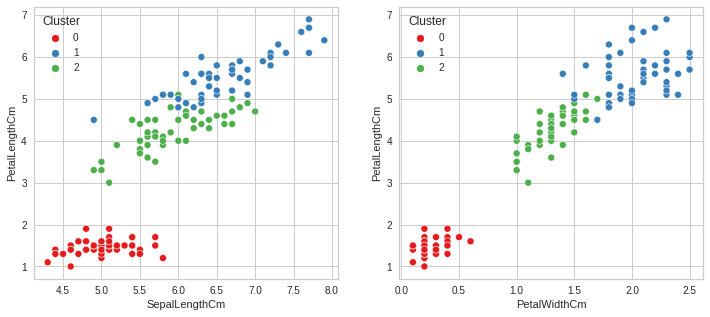

In [92]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('SepalLengthCm', 'PetalLengthCm', data=KM_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('PetalWidthCm', 'PetalLengthCm', data=KM_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_clustered.cluster_centers_[:,1],KM_clustered.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_clustered.cluster_centers_[:,0],KM_clustered.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

#Lets try logitistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_X,train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [48]:
y_pred = lr.predict(test_X)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_pred)*100

94.73684210526315

Lets try Naive Bayes
- used for text classification e.g spam detection
- probabilistic classifer makes classes using maximum A posteriori

In [56]:
from sklearn.naive_bayes import GaussianNB
s=GaussianNB()
s.fit(train_X,train_y)

GaussianNB()

In [57]:
y_pred=s.predict(test_X)
y_pred


array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1])

In [58]:
le.inverse_transform(y_pred) # in text format


array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

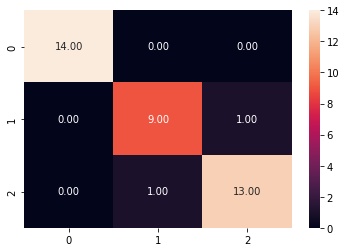

In [64]:
sns.heatmap(data=confusion_matrix(test_y, y_pred), annot=True, fmt=".2f")

In [60]:
# Checking accuracy 
from sklearn.metrics import accuracy_score
ab=accuracy_score(test_y,y_pred)*100
ab

94.73684210526315

Decision Tree
- supervised algo
- How it works? Split the sample into homogeneous sets based on most significant input variable.

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(train_X,train_y)
dt_predict = dt_model.predict(test_X)

print('Decision Tree - ',accuracy_score(dt_predict,test_y))

Decision Tree -  0.9473684210526315


Lets try SVM
- this method can be used to for both classification and regression
- How it works? Each data point is a point in n dimensional space, where n is the number of feaures. The value of each feature is a particular coordinate. Data is classifyed by finding hyper- plane that differentiates classes well. 

Support Vector = coordinates of data
Support Vector Machine = hyperplane that best seperates classes

In [62]:
from sklearn.svm import SVC


SVC accuracy score is:  1.0


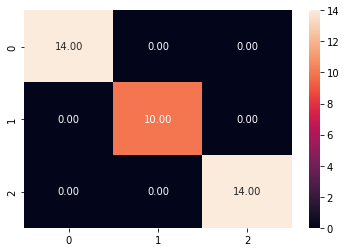

In [67]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(train_X,train_y)
y_preds = svc_model.predict(test_X)
print("SVC accuracy score is: ", accuracy_score(test_y, y_preds))
sns.heatmap(data=confusion_matrix(test_y, y_preds), annot=True, fmt=".2f")

Random Forest
- used for regression and classification
- combines output from multiple decision trees

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)

print('Random Forest - ',accuracy_score(rfc_predict,y_test))

#Lets try deep learning


```

```



In [75]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [93]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

In [ ]:
X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

In [94]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [95]:
shallow_model = Sequential()
shallow_model.add(Dense( 4, input_dim=4, activation = 'relu'))
shallow_model.add(Dense( units = 10, activation= 'relu'))
shallow_model.add(Dense( units = 3, activation= 'softmax'))
shallow_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [98]:
shallow_history = shallow_model.fit(X_train, y_train, epochs = 150, validation_data = (X_test, y_test))

Epoch 1/150
4/4 [==============================] - 4s 370ms/step - loss: 0.7008 - accuracy: 0.3083 - val_loss: 0.6791 - val_accuracy: 0.5000
Epoch 2/150
4/4 [==============================] - 0s 19ms/step - loss: 0.6974 - accuracy: 0.3083 - val_loss: 0.6765 - val_accuracy: 0.4667
Epoch 3/150
4/4 [==============================] - 0s 13ms/step - loss: 0.6938 - accuracy: 0.3333 - val_loss: 0.6737 - val_accuracy: 0.4667
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6904 - accuracy: 0.3333 - val_loss: 0.6709 - val_accuracy: 0.4667
Epoch 5/150
4/4 [==============================] - 0s 13ms/step - loss: 0.6870 - accuracy: 0.3417 - val_loss: 0.6682 - val_accuracy: 0.4333
Epoch 6/150
4/4 [==============================] - 0s 14ms/step - loss: 0.6836 - accuracy: 0.3750 - val_loss: 0.6654 - val_accuracy: 0.4000
Epoch 7/150
4/4 [==============================] - 0s 14ms/step - loss: 0.6801 - accuracy: 0.4083 - val_loss: 0.6624 - val_accuracy: 0.3667
Epoch 8/150
4/4 [==

In [105]:
shallow_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

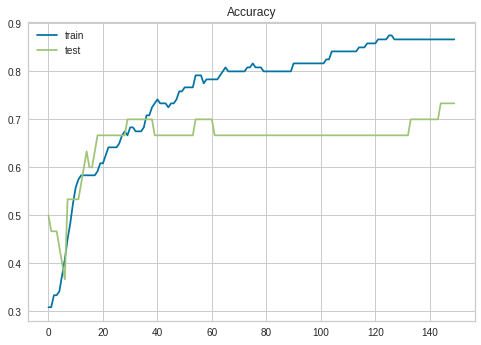

In [108]:
plt.plot(shallow_history.history['accuracy'])
plt.plot(shallow_history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()


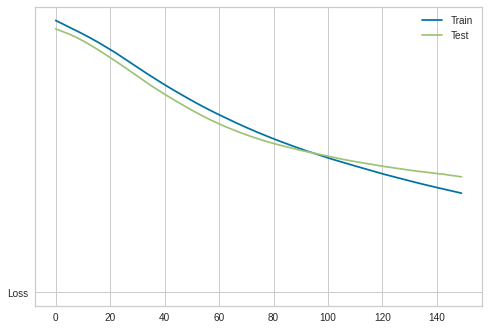

In [107]:
plt.plot(shallow_history.history['loss'])
plt.plot(shallow_history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train','Test'])
plt.show()